# LINEAR REGRESSION

The workhorse of statistical analysis is the linear model, particularly regression. Invented by Francis Galton to study relationship between parents and children described as regressing to the mean, it has become one of the most widely used modeling techniques. In this tutorial, we will focus on simple linear regression.

SIMPLE LINEAR REGRESSION

The simple linear regression determines the relationship between two variables. That is we are using one variable to tell us what we can expect from the other variable. The outcome variable, what we are trying to predict, is called the response variable, and the input variable, what we are using to predict, is called the predictor variable. The general idea of the simple linear regression is to use the predictor to come up with some average value of the response. The relationship is defined as: y = a + bx + E, where a is the intercept; and b is the slope; E is the error term; x is the predictor variable; and y is the outcome/response variable. The equation describes is essentially a straight line that goes through the data where a is the y-intercept and b is the slope. First, install the required packages for our analysis.

In [1]:
install.packages("UsingR")

install.packages("ggcorrplot")
install.packages("car")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [20]:
library("ggcorrplot")
library(car)
library("tidyverse")
library("ggplot2")
# install usingR and ggplot2 packages; packages already installed; loading them using library()
library(UsingR)
library(broom) # helps to tidy up model outputs

In [3]:
library(repr)
options(repr.plot.width=5, repr.plot.height=3)

The father.son data is Pearson’s data set on heights of fathers and their sons. The data set contains 1078 measurements of fathers’ heights and sons’ heights. Its class is a data.frame with 1078 observations on the following 2 variables: fheight for fathers’ heights in inches and sheight for sons’ heights in inches. This data set was used by Pearson to investigate regression. The above information can be found by just typing ?father.son. Alternatively, using the following commands can get you accustomed with the data set.



In [4]:
# The first 10 observation of our dataset using the print(head(data, n = 10)) function
head(father.son, n = 5)

fheight,sheight
65.04851,59.77827
63.25094,63.21404
64.95532,63.34242
65.75250,62.79238
61.13723,64.28113


In [5]:
# The first 10 observation of our dataset using the print(head(data, n = 10)) function
tail(father.son, n = 5)

,fheight,sheight
1074,66.99681,70.75232
1075,71.33181,68.26774
1076,71.78314,69.30589
1077,70.73837,69.30199
1078,70.30609,67.01500


In [6]:
str(father.son)

'data.frame':	1078 obs. of  2 variables:
 $ fheight: num  65 63.3 65 65.8 61.1 ...
 $ sheight: num  59.8 63.2 63.3 62.8 64.3 ...


In [7]:
summary(father.son)

    fheight         sheight     
 Min.   :59.01   Min.   :58.51  
 1st Qu.:65.79   1st Qu.:66.93  
 Median :67.77   Median :68.62  
 Mean   :67.69   Mean   :68.68  
 3rd Qu.:69.60   3rd Qu.:70.47  
 Max.   :75.43   Max.   :78.36  

We can visualize the distribution of fathers’ heights by dividing the x axis into bins and counting the number of observations in each bin. Histogram, geom_histogram in the ggplot2 package, displays the count with bars, while geom_freqpoly displays the counts with lines. Frequency polygons are more suitable when you want to compare the distribution across the levels of a categorical variable.

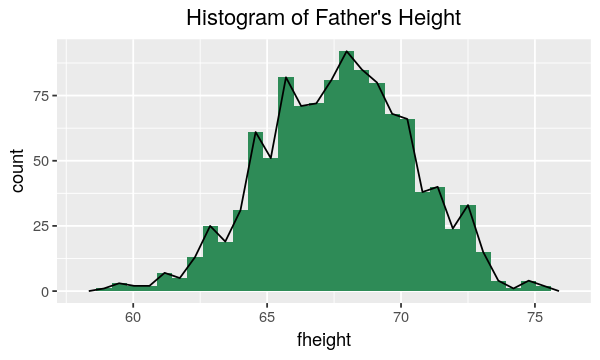

In [8]:
# Histogram of father's height distribution
ggplot(data = father.son, mapping = aes(x = fheight)) +
  geom_histogram(bins = 30, fill = "seagreen") +
  geom_freqpoly(bins = 30) +
  ggtitle("Histogram of Father's Height") +
  theme(plot.title = element_text(hjust = 0.5)) 

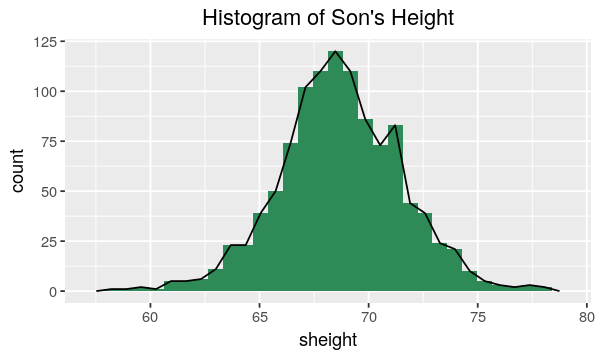

In [9]:
ggplot(data = father.son, mapping = aes(x = sheight)) +
  geom_histogram(bins = 30, fill = "seagreen") +
  geom_freqpoly(bins = 30) +
  ggtitle("Histogram of Son's Height") +
  theme(plot.title = element_text(hjust = 0.5)) 

We can infer that both father’s height and son’s height seem to be normally distributed, according to the plotted histograms. We can extend our analysis by looking at how father’s height influences son’s height using simple linear regression.



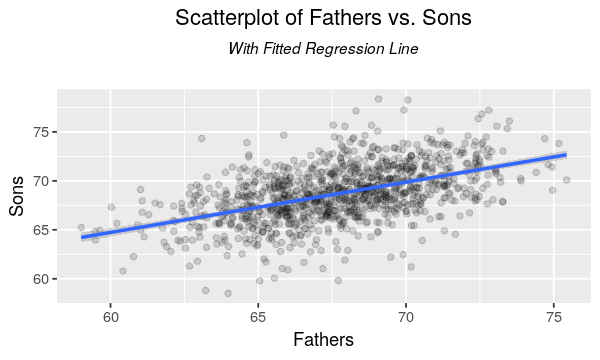

In [10]:
# Using fathers' heights to predict sons' heights with a geom_smooth () function
ggplot(data = father.son, mapping = aes(x = fheight, y = sheight)) + 
  geom_point(alpha = .15) +
  geom_smooth(method = "lm") + 
  labs(x = "Fathers", y = "Sons") +
  ggtitle(expression(atop("Scatterplot of Fathers vs. Sons", atop(italic("With Fitted Regression Line", ""))))) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(plot.subtitle = element_text(hjust = 0.5))

In [11]:
# Calculate Linear regression using lm() function
(height.lm <- lm(sheight ~ fheight, data = father.son))


Call:
lm(formula = sheight ~ fheight, data = father.son)

Coefficients:
(Intercept)      fheight  
    33.8866       0.5141  


In [12]:
summary(height.lm)


Call:
lm(formula = sheight ~ fheight, data = father.son)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8772 -1.5144 -0.0079  1.6285  8.9685 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.88660    1.83235   18.49   <2e-16 ***
fheight      0.51409    0.02705   19.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.437 on 1076 degrees of freedom
Multiple R-squared:  0.2513,	Adjusted R-squared:  0.2506 
F-statistic: 361.2 on 1 and 1076 DF,  p-value: < 2.2e-16


In [19]:
 tidy(height.lm)

term,estimate,std.error,statistic,p.value
(Intercept),33.886604,1.83235382,18.49348,1.604044e-66
fheight,0.514093,0.02704874,19.00618,1.121268e-69


# MULTIPLE LINEAR REGRESSION

In [13]:
## STORING DATA IN THE CSV FILE TO VARIABLE data
data = read_csv('data/clean_data_cars.csv')

Parsed with column specification:
cols(
  Brand = col_character(),
  Price = col_double(),
  Body = col_character(),
  Mileage = col_double(),
  EngineV = col_double(),
  Engine.Type = col_character(),
  Registration = col_character(),
  Year = col_double(),
  Model = col_character()
)


In [14]:
## VIEWING THE FIRST 6 ROWS USING HEAD() FUNCTION
head(data)

Brand,Price,Body,Mileage,EngineV,Engine.Type,Registration,Year,Model
BMW,4200,sedan,277,2.0,Petrol,yes,1991,320
Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter 212
Mercedes-Benz,13300,sedan,358,4.7,Gas,yes,2003,S 500
Audi,23000,crossover,240,4.2,Petrol,yes,2007,Q7
Toyota,18300,crossover,120,2.0,Petrol,yes,2011,Rav 4
Mercedes-Benz,40996,crossover,0,4.7,Petrol,yes,2016,GLS 63


In [15]:
##SUMMARY OF VARIABLES IN THE DATASET; STATISTICAL SUMMARY OF CONTINOUS VARIABLES AND VALUE COUNTS OF CATAGOTICAL VARIABLES
summary(data)

    Brand               Price           Body              Mileage     
 Length:4025        Min.   :  600   Length:4025        Min.   :  0.0  
 Class :character   1st Qu.: 6999   Class :character   1st Qu.: 90.0  
 Mode  :character   Median :11500   Mode  :character   Median :158.0  
                    Mean   :15778                      Mean   :162.4  
                    3rd Qu.:21900                      3rd Qu.:230.0  
                    Max.   :44000                      Max.   :440.0  
    EngineV      Engine.Type        Registration            Year     
 Min.   :0.600   Length:4025        Length:4025        Min.   :1990  
 1st Qu.:1.800   Class :character   Class :character   1st Qu.:2003  
 Median :2.200   Mode  :character   Mode  :character   Median :2007  
 Mean   :2.451                                         Mean   :2006  
 3rd Qu.:3.000                                         3rd Qu.:2012  
 Max.   :4.800                                         Max.   :2016  
    Model    

## Price is the Dependent / Predicted variable

- Assumption 1.  All Independent Variables Must have a linear relationship with the Dependent  Variable
- Assumption 2. There should be no Multicollinarity : The Independent variables should not have correlation among themseleves¶

In [16]:
## STORING ALL CONTINOUS INTO DATAFRAME "df"

df <- data %>% select(Price,Mileage,EngineV,Year)

ERROR: Error in select(., Price, Mileage, EngineV, Year): unused arguments (Price, Mileage, EngineV, Year)


In [ ]:
## STORING CORRELATION BETWEEN VARIABLES INTO DATAFRAME "df"

corr <- round(cor(df), 1)

In [ ]:
corr

In [ ]:
## USING ggcorrplot TO PLOT CORRELATION MATRIX

ggcorrplot(corr,lab=TRUE,type='lower',colors = c("#6D9EC1", "white", "#E46726"))

In [ ]:
dim(data)

In [ ]:
## SPLITTING DATA INTO TEST AND TRAIN DATA
data_train = slice(data, 1:3000)
data_test = slice(data, 3001:4025)

In [ ]:
head(data)

## MODEL I : WITHOUT CATAGORICAL VARIABLES

In [ ]:
## BUILDING MODEL WITHOUT CATAGORICAL VARIABLE
model_1 <- lm(Price~Mileage+EngineV+Year, data = data_train)

In [ ]:
## SUMMARY OF MODEL
summary(model_1)

In [ ]:
model_1

In [ ]:
#Predicting values
predicted_price <- predict(model_1,newdata =data_test)

#coverting into df
predicted_price = as.data.frame.vector(predicted_price)

In [ ]:
head(predicted_price)

In [ ]:
vif(model_1)

In [ ]:
actual_price = data_test$Price
actual_price = as.data.frame.vector(actual_price)

In [ ]:
head(actual_price)

In [ ]:
## DEFINING FUNCTION FOR MSE

mse <- function(predicted,actual,n)
{
    mse = sum(((actual-predicted)/n)^2)
    return (mse)
}

In [ ]:
dim(data_test)

In [ ]:
## USING FUNCTION "MSE" FOR CALCULATING MEAN SQUARED ERROR
round(mse(predicted_price,actual_price,1025))

In [ ]:
rmse=round(sqrt(mse))
rmse

# MODEL II : INCLUDING CATAGORICAL VARIABLES

In [ ]:
names(data)

In [ ]:
model_2 <- lm(Price~Brand+Body+Mileage+EngineV+Engine.Type+Registration+Year, data = data_train)

In [ ]:
summary(model_2)

In [ ]:
model_2

In [ ]:
#Predicting values
predicted_price <- predict(model_2,newdata = data_test[2:8])

#coverting into df
predicted_price = as.data.frame.vector(predicted_price)

In [ ]:
head(predicted_price)

In [ ]:
vif(model_2)

In [ ]:
actual_price = data_test$Price
actual_price = as.data.frame.vector(actual_price)
head(actual_price)

In [ ]:
## USING FUNCTION "MSE" FOR CALCULATING MEAN SQUARED ERROR
mse_model2=round(mse(predicted_price,actual_price,1025))

In [ ]:
mse_model2

In [ ]:
rmse_model2 = round(sqrt(mse_model2))
rmse_model2